# Final Project: San Francisco Crime Data

## Description

From a dataset from file, "SFCD_2018.csv" I want took at information concerning crimes that have taken place in San Franciso. The information includes the date, time, district, location, name, etc. of crime that is categorized in columns. With this data I hope to identify the crimes (look at the top ones commited), see how their frequency shifts over time, look at how crime occurences differ by weekday, look at how the crimes are being resolved, and then use parameters such as the date of the crime, location of crime, and the time of the crime to predict how future crimes will be resolved, via a SVM model.


The function used to carry this out, will be imported from the file: SFCrimeProjectCode.py


I'll break the project into three phases: 
- Function Implementation
- Feature Engineering & Plotting    
- SVM Modeling


## Function Implementation

In [1]:
from SFCrimeProjectCode import *       # Import file from which all code(functions) will be used.

In [2]:
CrimeFunc(CrimeData)                   # Outputs first 5 rows of the CrimeData to preview it.

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites)
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,182001522.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,191610728.0,...,-122.422464,"(37.78268536745206, -122.42246374465972)",100.0,4.0,11.0,39.0,NaN,NaN,NaN,NaN
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,191521989.0,...,-122.464145,"(37.779090726308574, -122.46414497098554)",5.0,8.0,4.0,11.0,NaN,NaN,NaN,NaN


## Feature Engineering and Modeling

In [3]:
top20Incidents(CrimeData)   # A table that gives the top 20 Crimes that occured in San Franciso between 2018 and July 1, 2019

,Crime,Occurences
0,"Theft, From Locked Vehicle, >$950",30499
1,Lost Property,8319
2,"Theft, Other Property, $50-$200",6830
3,Battery,6729
4,"Malicious Mischief, Vandalism to Property",6518
5,Mental Health Detention,5624
6,"Theft, Other Property, >$950",5264
7,"Vehicle, Recovered, Auto",4933
8,"Vehicle, Stolen, Auto",4697
9,"Warrant Arrest, Local SF Warrant",4323


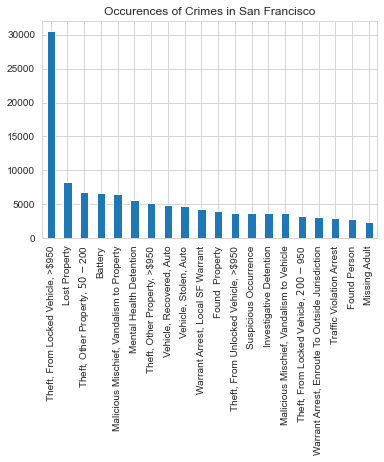

In [4]:
plottop20(Crime_Count)               # A plot of the top 20 crimes and the number of occurences

Monday       31719
Tuesday      31756
Wednesday    33035
Thursday     31778
Friday       34208
Saturday     32126
Sunday       29336
Name: Incident Day of Week, dtype: int64


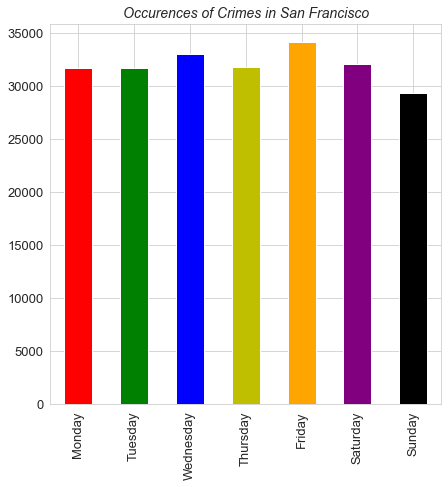

In [5]:
plot_week_occurence(CrimeData)   # A table of the number of crimes occurenes by weekday followed by a bar plot of the table.
                                 # As you can see most crimes typically occur on Friday, and least occur on Sunday.
                                 # This could be maybe because juveniles get out of school on Friday and stay out later, so more people are availiable to commit crimes.
                                 # Sunday is the sabbath for most religious people, so possibly out of respect, less crimes are commited.

In [6]:
IncidentbyMonth(CrimeData)                # Table gives the incident occurences for each month for years documented in the dataset which are 2018 and 2019. 
                                          # Notice that for 2019, incident were only reported up to July 1.

Incident Occurences
Jan. 2018                13403
     2019                11885
Feb. 2018                11927
     2019                10907
Mar. 2018                12604
     2019                11738
Apr. 2018                12589
     2019                11693
May  2018                13041
     2019                12055
Jun. 2018                12510
     2019                10923
Jul. 2018                13927
     2019                  182
Aug. 2018                13930
Sep. 2018                12874
Oct. 2018                13320
Nov. 2018                12065
Dec. 2018                12385

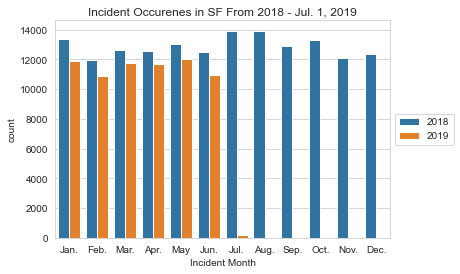

In [7]:
plotIncidentbyMonth(CrimeData)              # Plot the table from last cell.
                                            # Notice from 2018 to Jul 1 2019, crimes reported were signifigantly lower in 2019. So for the rest of 2019, crime occurences were most likely lower.
                                            # Also notice that July and August had higher crime rates in 2018. This could be because during the summer, more people are outside, so there are more potential victims and more potential suspects.
                                            # Also, From Jan - Jun between 2018 and 2019, the relationship for the Crime Ocurrences seems to remain the same, although they are lower for 2019.

Open or Active             168496
Cite or Arrest Adult        51579
Unfounded                    1672
Cite or Arrest Juvenile      1559
Exceptional Adult             579
Exceptional Juvenile           73
Name: Resolution, dtype: int64


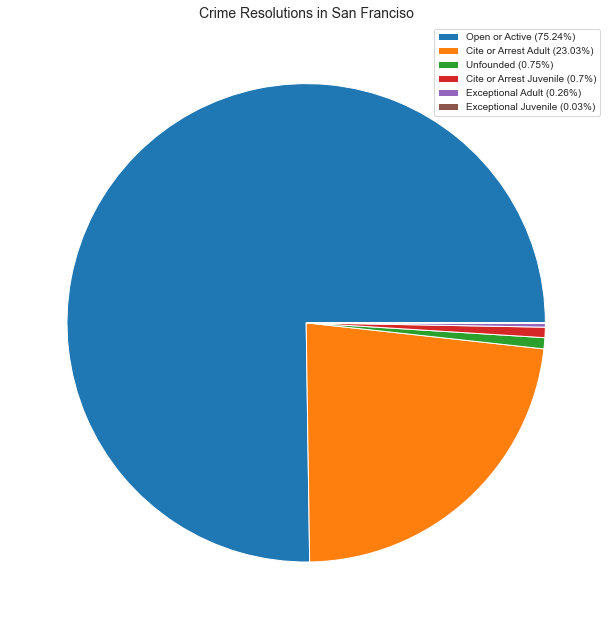

In [8]:
GetandPlotResolution(CrimeData)   # Prints out  table that matches resolutions for crimes with number of times crimes were resolved that way.
                                  # Then Plots the table as pie chart. The Legend contains the distribution of resolutions.
    
                                  # As you can see resolutions: Open or Active and Cite of Arrest Adult, great exceed the others.
                                  # We can't stop crime, but at least data supports that action is taking place, and much less supects are getting away with crimes(Exceptional Adult and Juvenile frequencies are substantially low).
                                  # Also Unfounded is low (Only 0.75%!) , meaning the most of the suspectd reported aren't later absolved.
                                  # Also Cite or Arrest for Adults is roughly 33x as much as for Juveniles, so not much Juveniles are commiting crimes. So that is good.

## SVM Modeling

In [ ]:
SupVecMach(CrimeData) # Lastly, I've printed the Confusion Matrix(CM) and the Classification Report(CR) for the Crime Resoultions, based on the Time, Date, Day, and Location(Latitude and Longitude coordinates) Crime Occured.
                      # The CM and CR came from a SVM Model, I used the model with hope of being able to predict how a documented incidented would be resolved based on Date, Time, and Location an incident occurs. 
                      # Perhaps the model can predict how future crimes will be resolved, and if the predicted resolution is not promising, certain measures can be taken to assure the right resolution is applied.
                      # As you can see The non-zero measures for the Classification Report were great(1 or Approximately 1.00).
                      # However, for the Resolutions : Unfounded, Cite or Arrest Juvenile, Exceptional Adult  and Exceptional Juvenile, measures are 0, this is b/c there proportion is so small, compared to the other resolutions so there is nothing to predict.
                      # Note: You can look back on the frequency of each resolution in the cell above. (The Numbers in CR: 0,1,2,3,4,5 correspond with the legend)
                      # If the frequencies of the resolutions [2 - 5], that have zero measures increases significantly, this would not be much of a great model.
                      # Below is the table I trained in order to build SVM model.